In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
from atomphys.data import nist
from pprint import pprint
from atomphys.term import print_term, parse_term, QuantumNumbers

from atomphys.state import State, hyperfine_manifold

from pint import Quantity, get_application_registry

import networkx as nx

_ureg = get_application_registry()


In [3]:
atom = 'Ca ii'
all_states_data_raw = nist.fetch_states(atom, refresh_cache=False)
all_states_data = nist.parse_states(all_states_data_raw)

def _state(ix):
    psd = all_states_data[ix]
    return State(configuration=psd['configuration'], term=psd['term'], energy=psd['energy'])


In [21]:
# Load NIST data here, but not really using them for the moment

all_transitions_raw = nist.fetch_transitions(atom, refresh_cache=False)
# all_transitions_raw = [tr for tr in all_transitions_raw if float(tr['Ei(Ry)']) == 0]
all_transitions = nist.parse_transitions(all_transitions_raw)
all_transitions[:4]


[{'A': '2.42e+07s^-1',
  'state_i': {'energy': '0.1243897 Ry', 'term': '2D3/2'},
  'state_f': {'energy': '0.832333 Ry', 'term': '2F*5/2'},
  'acc': 'C',
  'type': ''},
 {'A': '2.58e+07s^-1',
  'state_i': {'energy': '0.1249427 Ry', 'term': '2D5/2'},
  'state_f': {'energy': '0.832333 Ry', 'term': '2F*7/2'},
  'acc': 'C',
  'type': ''},
 {'A': '1.72e+06s^-1',
  'state_i': {'energy': '0.1249427 Ry', 'term': '2D5/2'},
  'state_f': {'energy': '0.832333 Ry', 'term': '2F*5/2'},
  'acc': 'C',
  'type': ''},
 {'A': '3.28e+07s^-1',
  'state_i': {'energy': '0.1243897 Ry', 'term': '2D3/2'},
  'state_f': {'energy': '0.822874 Ry', 'term': '2F*5/2'},
  'acc': 'C',
  'type': ''}]

In [22]:
states = [_state(ix) for ix in range(5)]
all_states = [
    State(configuration=psd['configuration'], term=psd['term'], energy=psd['energy'])
    for psd in all_states_data
]
s0, s1, s2, s3, s4 = states
states

[State(3p6.4s 2S1/2 0 Ry),
 State(3p6.3d 2D3/2 0.1244 Ry),
 State(3p6.3d 2D5/2 0.1249 Ry),
 State(3p6.4p 2P*1/2 0.2296 Ry),
 State(3p6.4p 2P*3/2 0.2316 Ry)]

In [31]:
states[1].energy , _ureg.Quantity('0.1244 Ry')

(0.1243897 <Unit('rydberg')>, 0.1244 <Unit('rydberg')>)

In [32]:
import itertools

from atomphys.transition import Transition
from atomphys.atom import Atom
    

            
        

# g = nx.DiGraph()
# g.add_nodes_from(states)
# g.add_edges_from([(s0, s1), (s0, s3), (s1, s3)])

a = Atom()
a.add_states(all_states)
# a.add_states(states)

possible_transitions = {Transition(*pair) for pair in itertools.combinations(a.states, 2)}
# print({tr.wavelength for tr in possible_transitions})


def get_transition_by_wavelength(transitions, wavelength):
    wavelength = _ureg.Quantity(wavelength, 'nm')
    return min(transitions, key=lambda tr: abs(tr.wavelength - wavelength))

# # funky workaround
selected_transitions = {get_transition_by_wavelength(possible_transitions, w) for w in [729, 397, 866, 854]}
a.add_transitions(selected_transitions)
# a.add_transitions(possible_transitions)


g = a._graph



In [33]:
a

In [53]:
a.get_state_by_energy?

Signature: a.get_state_by_energy(energy: str | float | pint.registry.Quantity)
Docstring: <no docstring>
File:      c:\users\carmelo\eth\projects\pd_traps\deps\atomphys\atomphys\atom.py
Type:      method

In [35]:
a.get_state_by_energy('0.1 Ry')

State(3p6.3d 2D3/2 0.1244 Ry)

In [36]:
a.states

[State(3p6.4s 2S1/2 0 Ry),
 State(3p6.3d 2D3/2 0.1244 Ry),
 State(3p6.3d 2D5/2 0.1249 Ry),
 State(3p6.4p 2P*1/2 0.2296 Ry),
 State(3p6.4p 2P*3/2 0.2316 Ry),
 State(3p6.5s 2S1/2 0.4754 Ry),
 State(3p6.4d 2D3/2 0.518 Ry),
 State(3p6.4d 2D5/2 0.5181 Ry),
 State(3p6.5p 2P*1/2 0.5516 Ry),
 State(3p6.5p 2P*3/2 0.5523 Ry),
 State(3p6.4f 2F*7/2 0.6202 Ry),
 State(3p6.4f 2F*5/2 0.6202 Ry),
 State(3p6.6s 2S1/2 0.6441 Ry),
 State(3p6.5d 2D3/2 0.6627 Ry),
 State(3p6.5d 2D5/2 0.6628 Ry),
 State(3p6.6p 2P*1/2 0.6788 Ry),
 State(3p6.6p 2P*3/2 0.6791 Ry),
 State(3p6.5f 2F*7/2 0.7111 Ry),
 State(3p6.5f 2F*5/2 0.7111 Ry),
 State(3p6.5g 2G7/2 0.7123 Ry),
 State(3p6.5g 2G9/2 0.7123 Ry),
 State(3p6.7s 2S1/2 0.724 Ry),
 State(3p6.6d 2D3/2 0.7338 Ry),
 State(3p6.6d 2D5/2 0.7338 Ry),
 State(3p6.6f 2F*5/2 0.7605 Ry),
 State(3p6.6f 2F*7/2 0.7605 Ry),
 State(3p6.6g 2G7/2 0.7613 Ry),
 State(3p6.6g 2G9/2 0.7613 Ry),
 State(3p6.8s 2S1/2 0.7682 Ry),
 State(3p6.7d 2D3/2 0.774 Ry),
 State(3p6.7d 2D5/2 0.774 Ry),
 Stat

In [37]:
a.get_transition_by_wavelength(729)

Transition(3p6.4s 2S1/2 --> 3p6.3d 2D5/2 729 nm)

In [38]:
a.transitions

[Transition(3p6.4s 2S1/2 --> 3p6.3d 2D5/2 729 nm),
 Transition(3p6.4s 2S1/2 --> 3p6.4p 2P*1/2 397 nm),
 Transition(3p6.3d 2D3/2 --> 3p6.4p 2P*1/2 866 nm),
 Transition(3p6.3d 2D5/2 --> 3p6.4p 2P*3/2 854 nm)]

In [39]:
Transition(s0, s3) == Transition(s3, s0)

True

In [40]:
ww = [tr.wavelength for tr in possible_transitions]


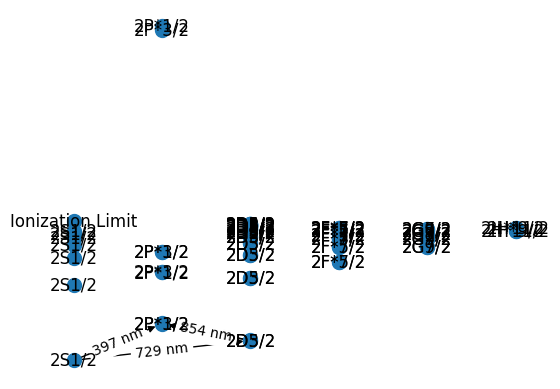

In [51]:
from atomphys.plot import plot_atom

plot_atom(a, spread_threshold=None)

In [42]:
# def spring_layout_y_pos(states: list[State]):
#     pass



In [16]:
a.transitions_from(s1)

[Transition(3p6.3d 2D3/2 --> 3p6.4p 2P*1/2 866 nm)]

In [17]:
a.transitions_to(s1)

[]

In [18]:
q = _ureg.Quantity('3P*3/2')

In [19]:
q.check('Ry')

False

In [20]:
from atomphys.util import set_default_units

In [21]:
set_default_units('3P3/2', 'Ry')

UndefinedUnitError: 'P3' is not defined in the unit registry

In [ ]:
from atomphys.atom import _get_state_by_name

In [ ]:
_get_state_by_name(a.states, 'p*1/2')

State(3p6.4p 2P*1/2 0.2296 Ry)